In [1]:
import pandas as pd
import sqlite3

- analyze only the users and not the admins
- the fontsize and the figsize are still the same
- night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon
is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
- choose a palette that you really enjoy, you do not have to replicate it from the graph
above
- at the end of your Jupyter Notebook, create a markdown cell and insert the ques-
tions:

    - “When do our users usually commit the labs: in the night, morning, afternoon,
    or evening?”, the answer is the two most common periods.
    - Which day has:

        - the most number of commits
        - and at the same time, the number of commits in the evening is higher than in the afternoon?

- The answer is the date of that day.

In [6]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [39]:
query = """
SELECT date,
        period_of_day,
        COUNT(*) AS commits_count
FROM (SELECT 
            DATE(timestamp) as date, 
            CASE
            WHEN TIME(timestamp) >= '00:00:00' AND TIME(timestamp) <= '03:59:59'
                THEN 'night'
            WHEN TIME(timestamp) >= '04:00:00' AND TIME(timestamp) <= '09:59:59'
                THEN 'morning'
            WHEN TIME(timestamp) >= '10:00:00' AND TIME(timestamp) <= '16:59:59'
                THEN 'afternoon'
            ELSE 'evening'
            END AS period_of_day
        FROM checker 
        WHERE uid LIKE 'user_%') t
GROUP BY 1,2"""
df = pd.io.sql.read_sql(query, conn)
df.head(5)

,date,period_of_day,commits_count
0,2020-04-17,afternoon,10
1,2020-04-17,morning,13
2,2020-04-18,afternoon,33
3,2020-04-18,evening,35
4,2020-04-18,morning,1


In [40]:
df_pivot = pd.pivot_table(df, values='commits_count', index='date', columns='period_of_day')

In [41]:
df_pivot

period_of_day,afternoon,evening,morning,night
date,,,,
2020-04-17,10.0,NaN,13.0,NaN
2020-04-18,33.0,35.0,1.0,NaN
2020-04-19,16.0,11.0,4.0,2.0
2020-04-20,12.0,13.0,NaN,NaN
2020-04-21,NaN,25.0,NaN,NaN
2020-04-22,4.0,24.0,NaN,NaN
2020-04-23,15.0,20.0,6.0,2.0
2020-04-24,4.0,12.0,NaN,NaN
2020-04-25,33.0,49.0,21.0,1.0


<Axes: title={'center': 'commits per day'}, xlabel='date'>

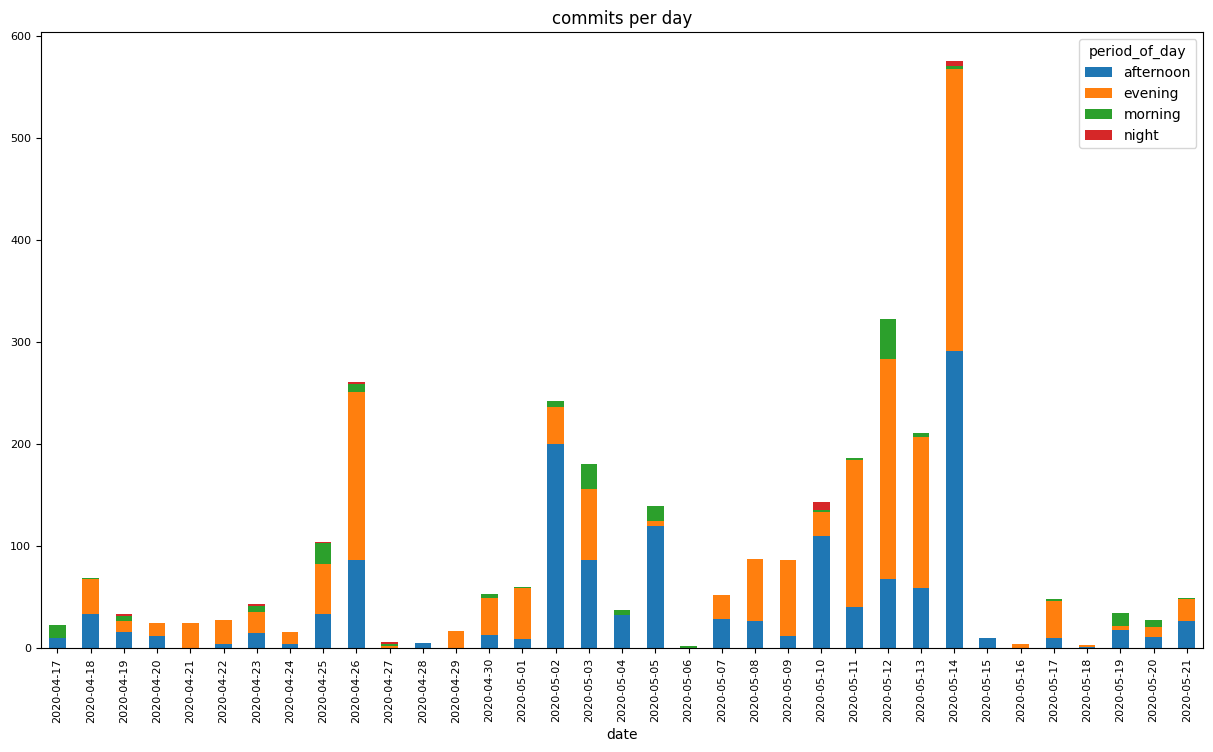

In [42]:
df_pivot.plot(kind='bar', 
        title='commits per day',
        rot=90, 
        figsize=(15, 8), 
        fontsize=8,
        stacked=True)

In [43]:
conn.close()

In [44]:
df_pivot.sum()

period_of_day
afternoon    1391.0
evening      1611.0
morning       184.0
night          21.0
dtype: float64

“When do our users usually commit the labs: in the night, morning, afternoon,
or evening?”, the answer is the two most common periods.  
ANSWER: evening, afternoon

In [48]:
df_pivot[df_pivot.evening > df_pivot.afternoon].sum(axis=1).sort_values(ascending=False)

date
2020-05-12    323.0
2020-04-26    261.0
2020-05-13    211.0
2020-05-11    186.0
2020-04-25    104.0
2020-05-08     87.0
2020-05-09     86.0
2020-04-18     69.0
2020-05-01     60.0
2020-04-30     53.0
2020-05-17     48.0
2020-04-23     43.0
2020-04-22     28.0
2020-04-20     25.0
2020-04-24     16.0
2020-05-18      3.0
dtype: float64

Which day has:
- the most number of commits
- and at the same time, the number of commits in the evening is higher than in the afternoon?  
ANSWER: 2020-05-12